In [20]:
# Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
df = pd.read_csv("OnlineRetail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [5]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom


In [6]:
# Data Preprocessing
df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

In [7]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114
std,1713.600303,218.081158,96.759853
min,12346.000000,-80995.000000,-11062.060000
25%,13953.000000,1.000000,1.250000
50%,15152.000000,3.000000,2.080000
75%,16791.000000,10.000000,4.130000
max,18287.000000,80995.000000,38970.000000


In [8]:
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [9]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]

new_df2 = df.copy()

In [10]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,12/1/2010 8:26,United Kingdom
1,17850.0,536365,71053,6,20.34,12/1/2010 8:26,United Kingdom
2,17850.0,536365,84406B,8,22.00,12/1/2010 8:26,United Kingdom
3,17850.0,536365,84029G,6,20.34,12/1/2010 8:26,United Kingdom
4,17850.0,536365,84029E,6,20.34,12/1/2010 8:26,United Kingdom


In [11]:
country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


<AxesSubplot:xlabel='Country'>

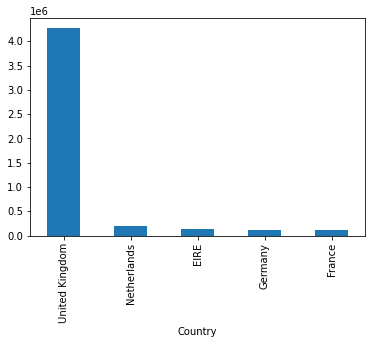

In [12]:
# Top 5 Companies with high number of purchase
country_price[:5].plot(kind = 'bar')

<AxesSubplot:xlabel='Country'>

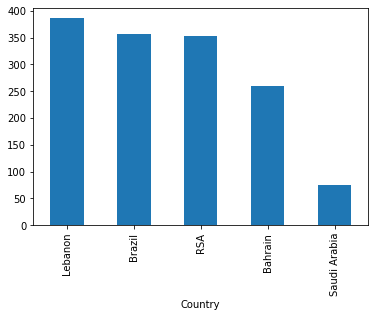

In [13]:
# 5 Compaies with least number of purchase
country_price[33:].plot(kind = 'bar')